In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap

In [33]:
df = pd.read_csv('/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv')

In [34]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766103 entries, 0 to 766102
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           766103 non-null  int64  
 1   Date Rptd       766103 non-null  object 
 2   DATE OCC        766103 non-null  object 
 3   TIME OCC        766103 non-null  int64  
 4   AREA            766103 non-null  int64  
 5   AREA NAME       766103 non-null  object 
 6   Rpt Dist No     766103 non-null  int64  
 7   Part 1-2        766103 non-null  int64  
 8   Crm Cd          766103 non-null  int64  
 9   Crm Cd Desc     766103 non-null  object 
 10  Mocodes         660902 non-null  object 
 11  Vict Age        766103 non-null  int64  
 12  Vict Sex        665906 non-null  object 
 13  Vict Descent    665900 non-null  object 
 14  Premis Cd       766094 non-null  float64
 15  Premis Desc     765654 non-null  object 
 16  Weapon Used Cd  266374 non-null  float64
 17  Weapon Des

In [36]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           105201
Vict Age               0
Vict Sex          100197
Vict Descent      100203
Premis Cd              9
Premis Desc          449
Weapon Used Cd    499729
Weapon Desc       499729
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          709428
Crm Cd 3          764214
Crm Cd 4          766046
LOCATION               0
Cross Street      643013
LAT                    0
LON                    0
dtype: int64

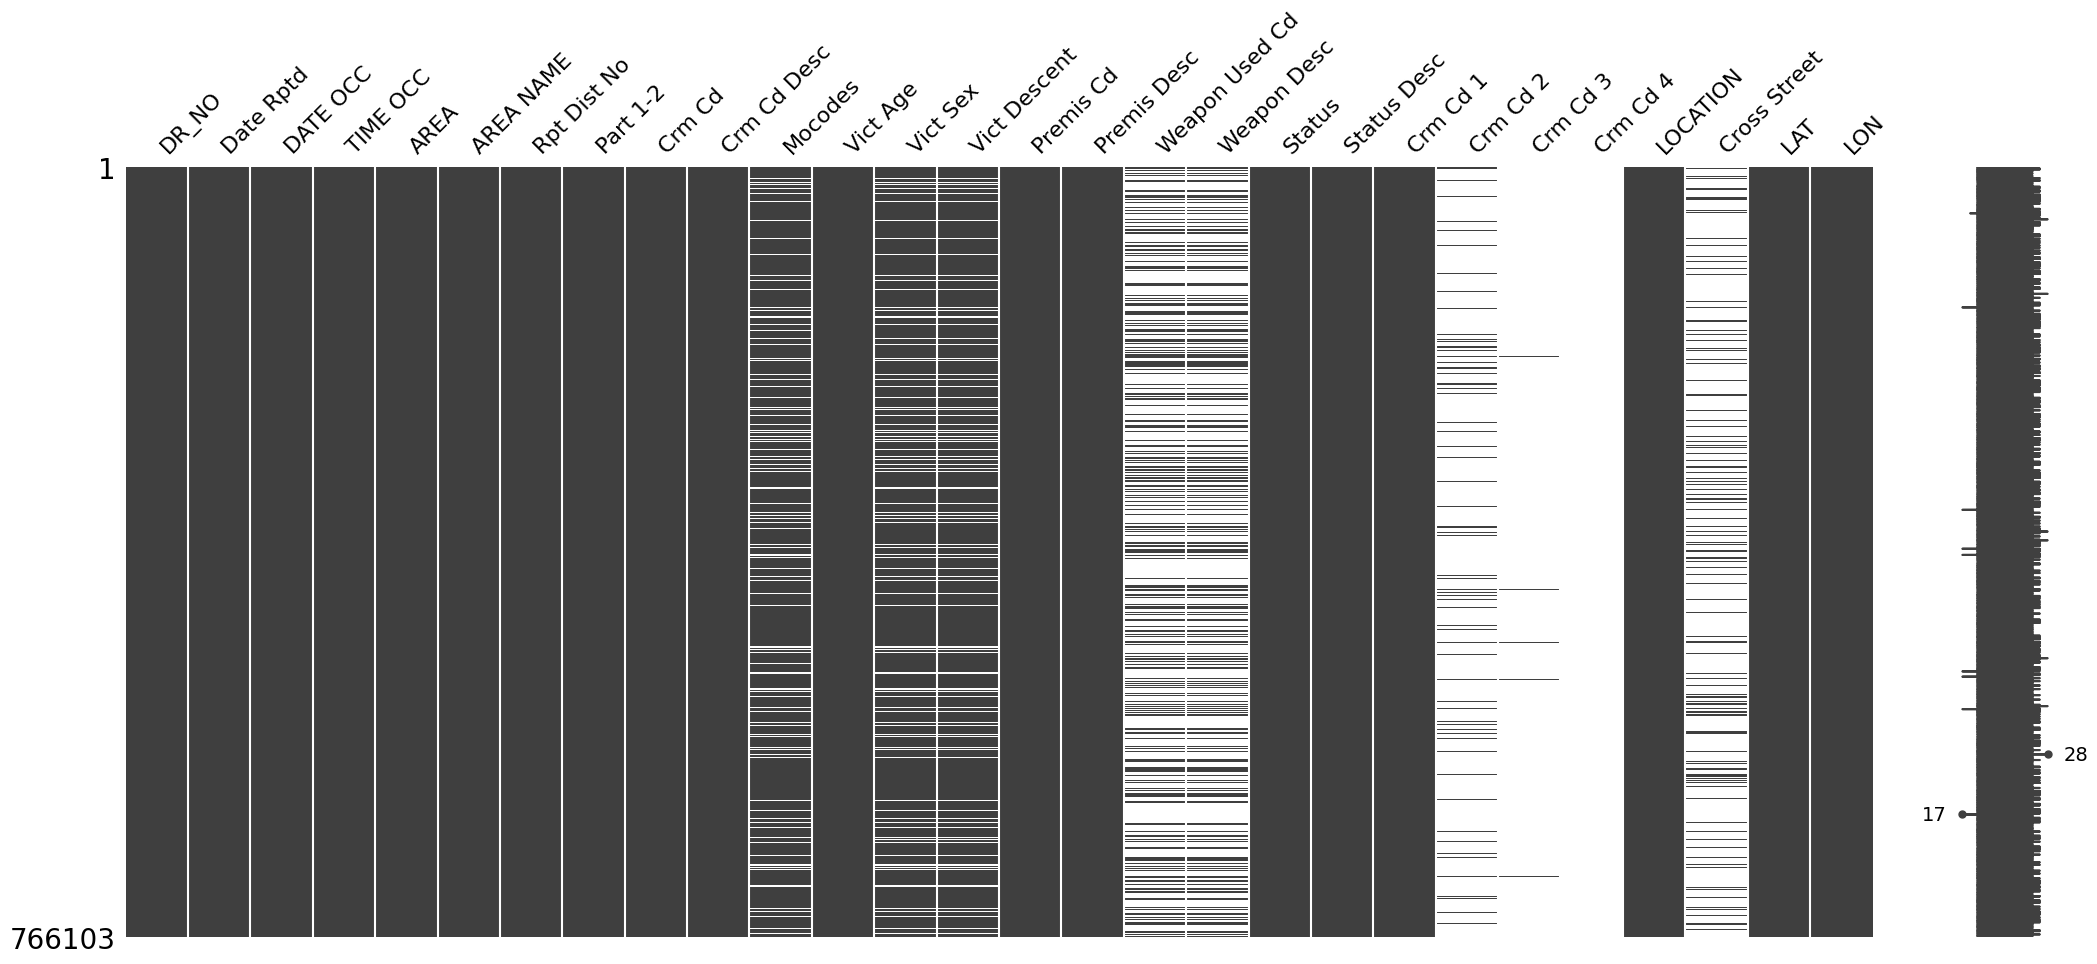

In [37]:
import missingno as msno
msno.matrix(df)
plt.show()

In [38]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

Column dropped because there are too many empty rows or the information is not relevant in the exploration

In [39]:
df = df.drop(columns = ['DR_NO', 'AREA',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'])

In [40]:
df.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME', 'Crm Cd Desc',
       'Vict Age', 'Vict Sex', 'Status', 'Status Desc', 'LOCATION',
       'Cross Street', 'LAT', 'LON'],
      dtype='object')

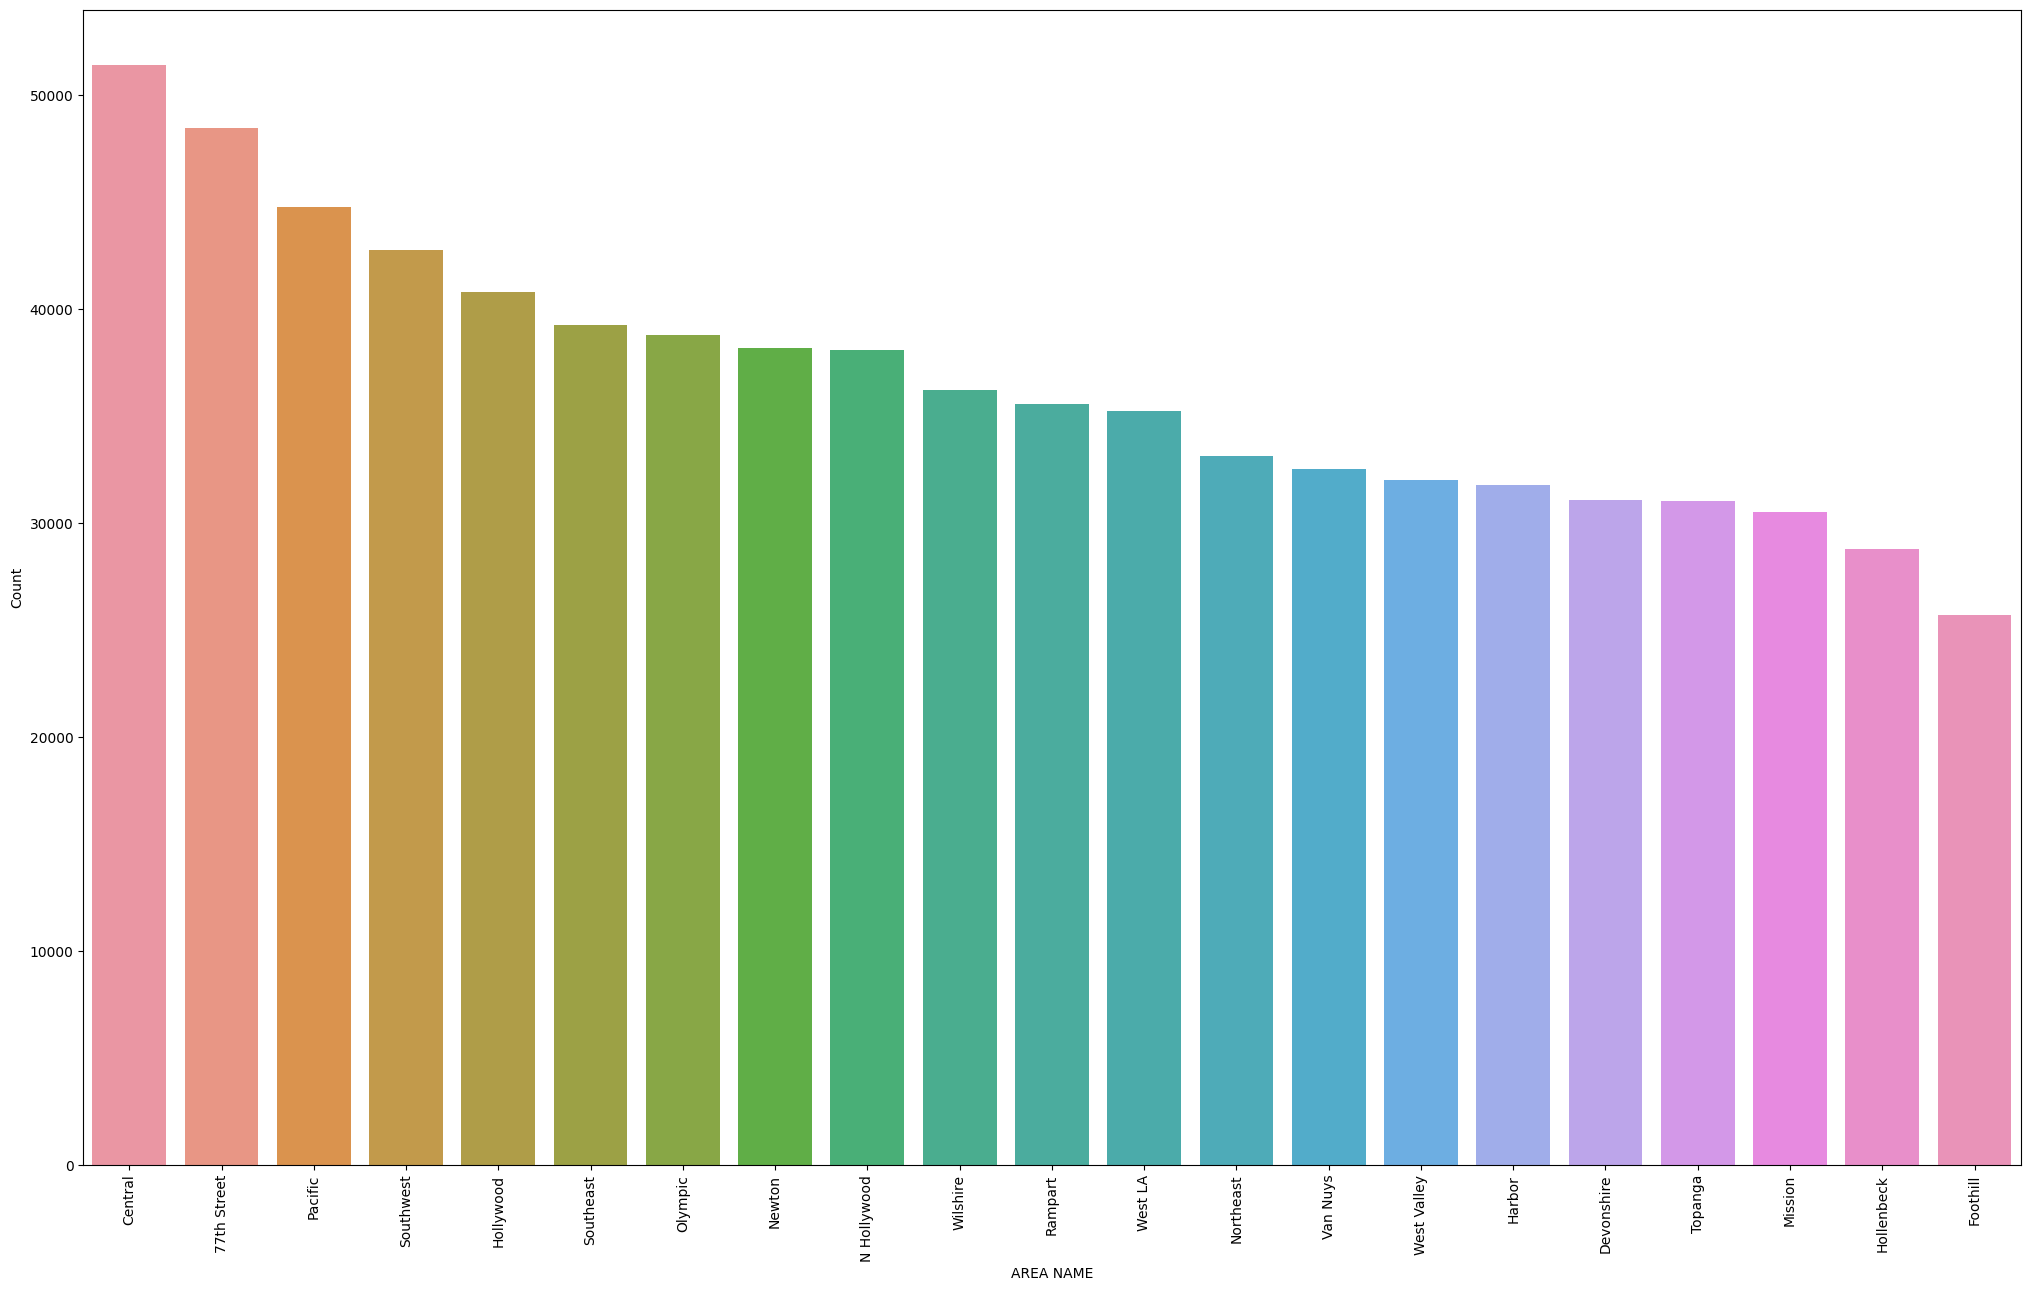

In [41]:
df['AREA_NAME'] = df['AREA NAME']

df2 = pd.DataFrame(columns = ['AREA_NAME'])
df2['AREA_NAME']=[each for each in df.AREA_NAME.unique()]
df2["Count"]=[len(df[df.AREA_NAME==each]) for each in df2.AREA_NAME]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.AREA_NAME.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('AREA NAME')
plt.ylabel('Count')
plt.show()

Since this is the total amount of crime per area since 2020, let's calculate the daily crime per area per day. The CSV has been last updated on July 29th 2023.

In [42]:
from datetime import date

d1 = date(2020, 1, 1)
d2 = date(2023, 7, 29)

daydiff = (d2 - d1).days



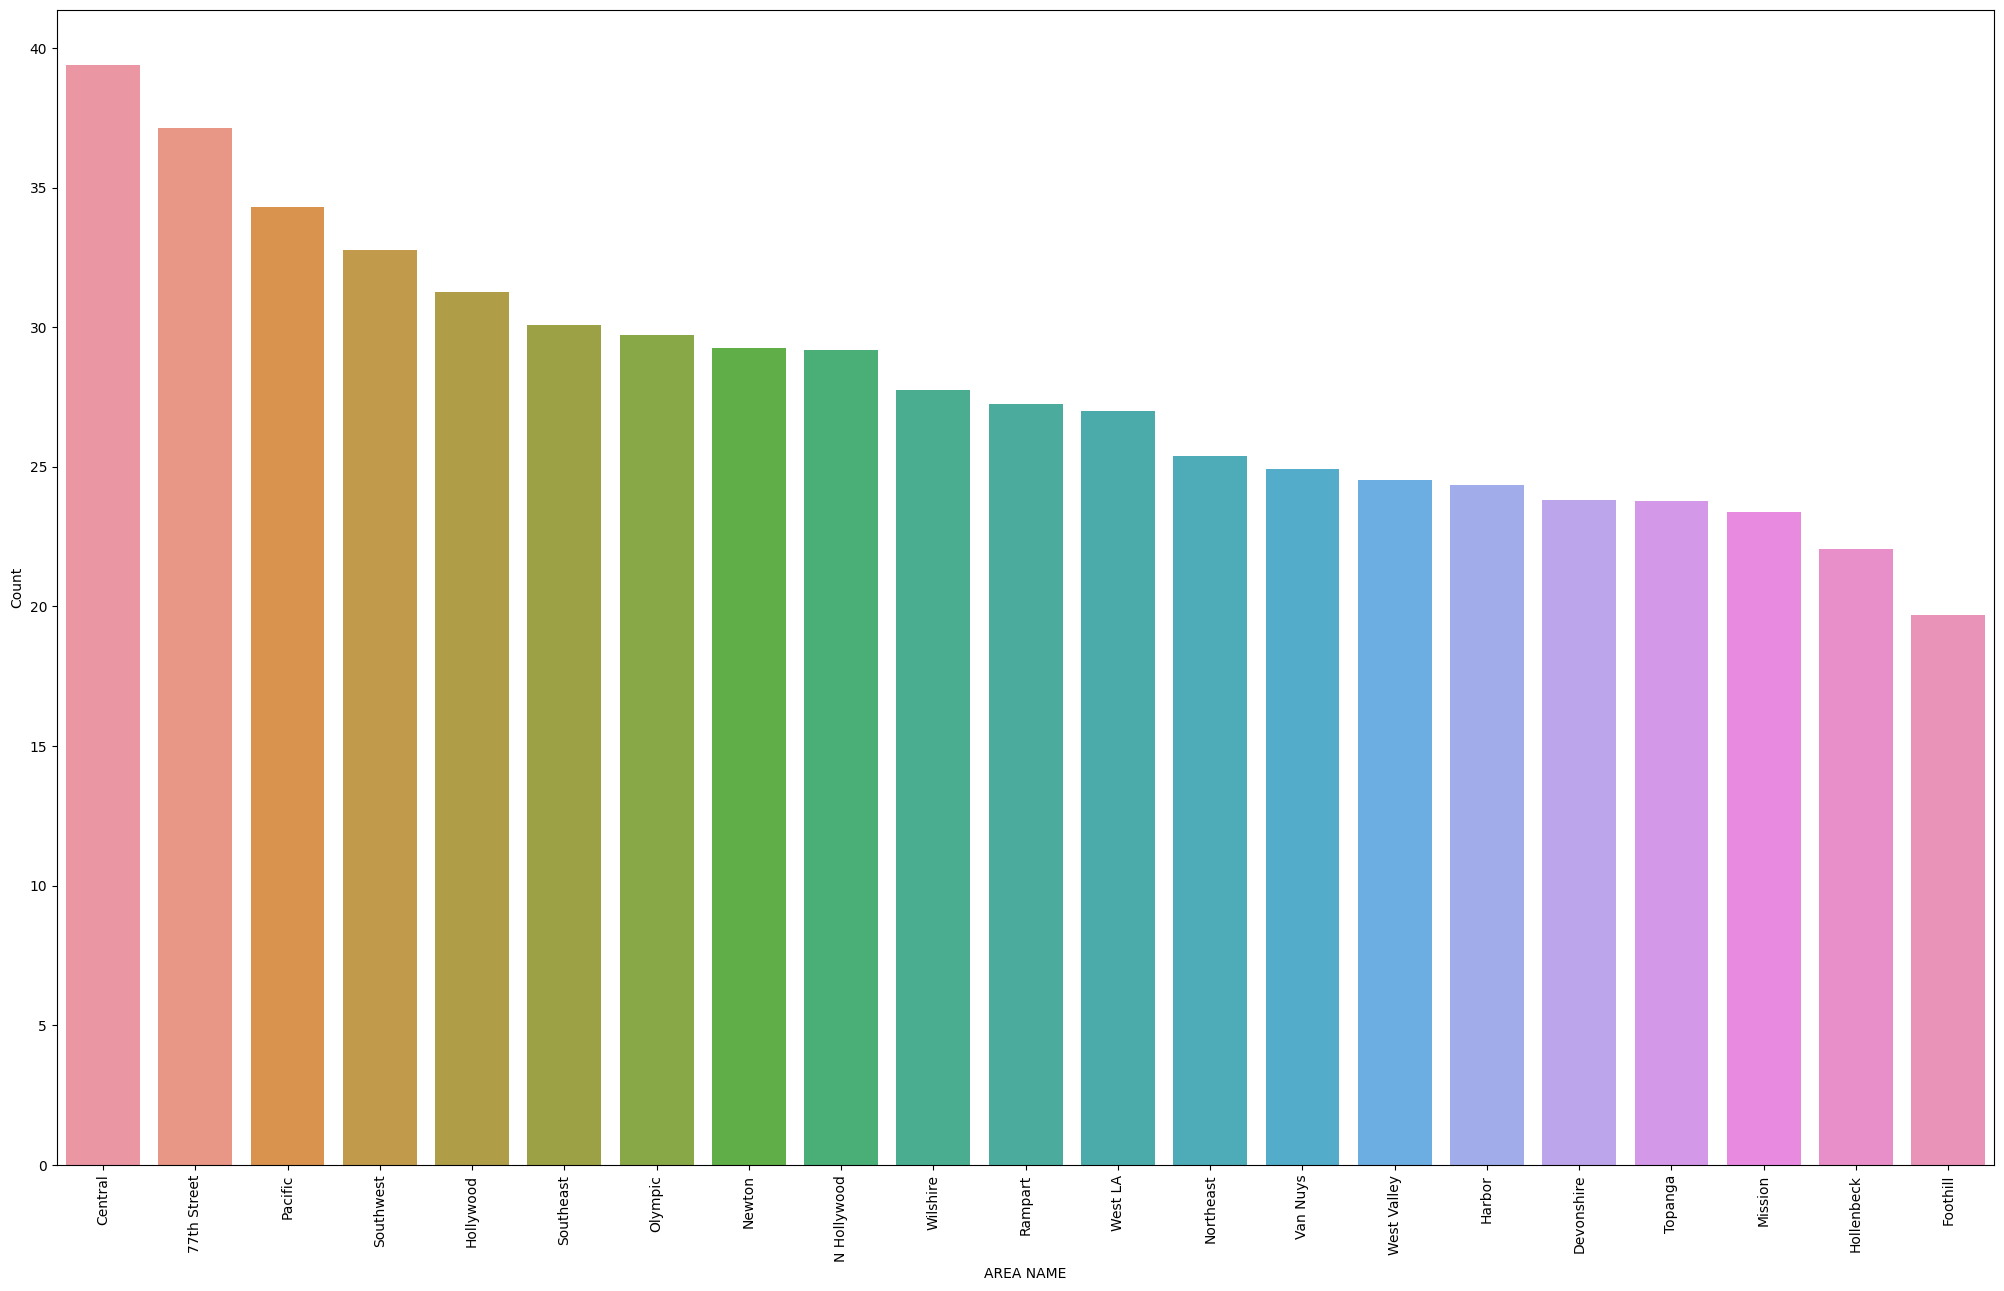

In [43]:
df['AREA_NAME'] = df['AREA NAME']

df2 = pd.DataFrame(columns = ['AREA_NAME'])
df2['AREA_NAME']=[each for each in df.AREA_NAME.unique()]
df2["Count"]=[len(df[df.AREA_NAME==each]) for each in df2.AREA_NAME]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.AREA_NAME.head(50), y=df2.Count.head(50)/daydiff)
plt.xticks(rotation= 90)
plt.xlabel('AREA NAME')
plt.ylabel('Count')
plt.show()

There is a lot of crime on average in LA



This will show us the area using longitude and latitude.

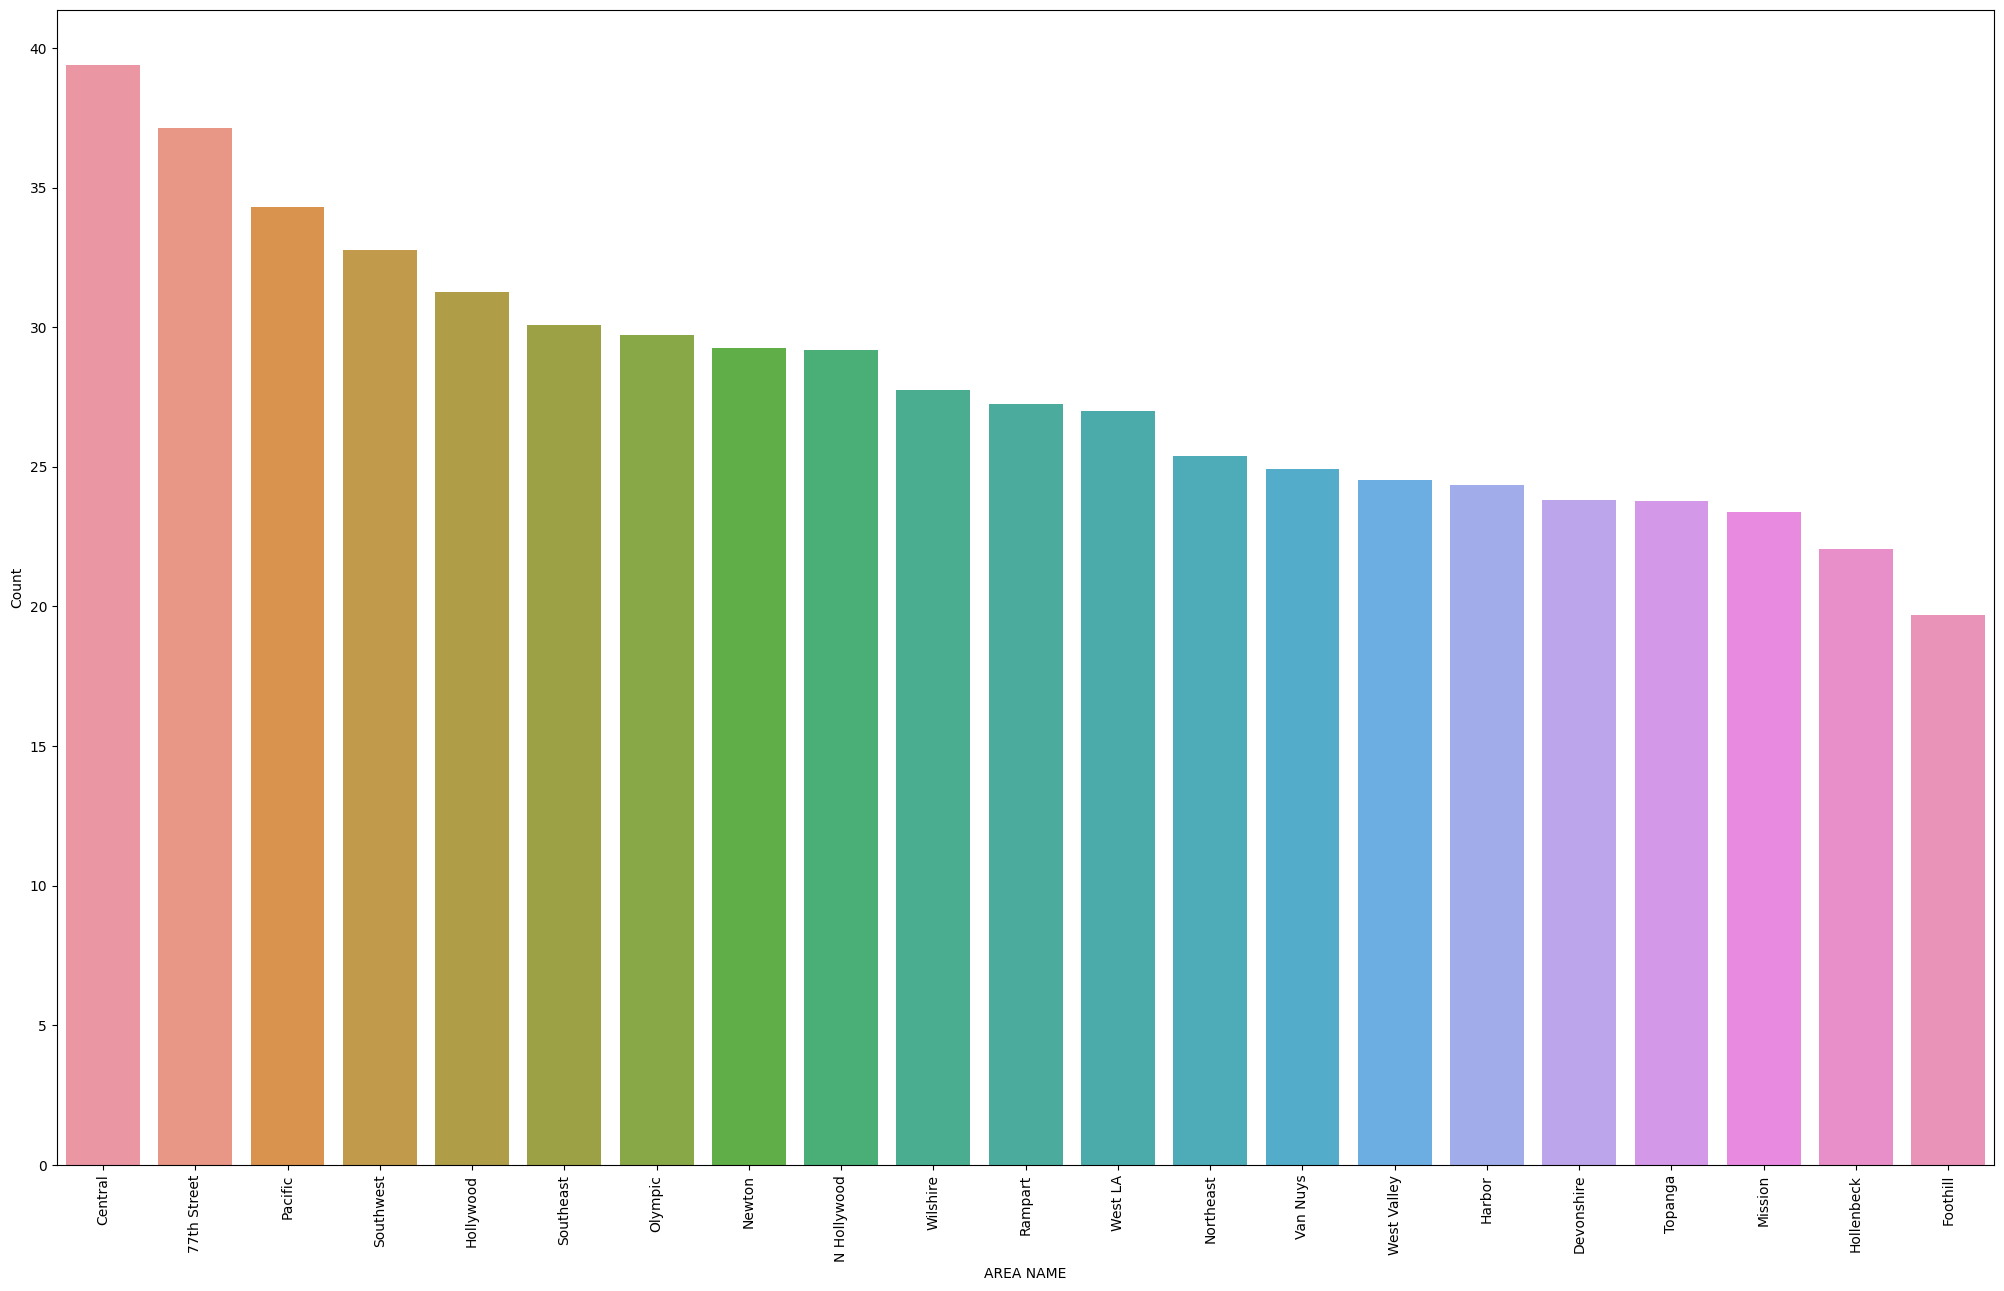

In [44]:
df['AREA_NAME'] = df['AREA NAME']

df2 = pd.DataFrame(columns = ['AREA_NAME'])
df2['AREA_NAME']=[each for each in df.AREA_NAME.unique()]
df2["Count"]=[len(df[df.AREA_NAME==each]) for each in df2.AREA_NAME]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.AREA_NAME.head(50), y=df2.Count.head(50)/daydiff)
plt.xticks(rotation= 90)
plt.xlabel('AREA NAME')
plt.ylabel('Count')
plt.show()

Interactive map where the crimes have been committed

In [45]:
fig = px.scatter_mapbox(df.iloc[0:10000], lat="LAT", lon="LON",
                        color_discrete_sequence=["fuchsia"], zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Let's look at the type of crimes

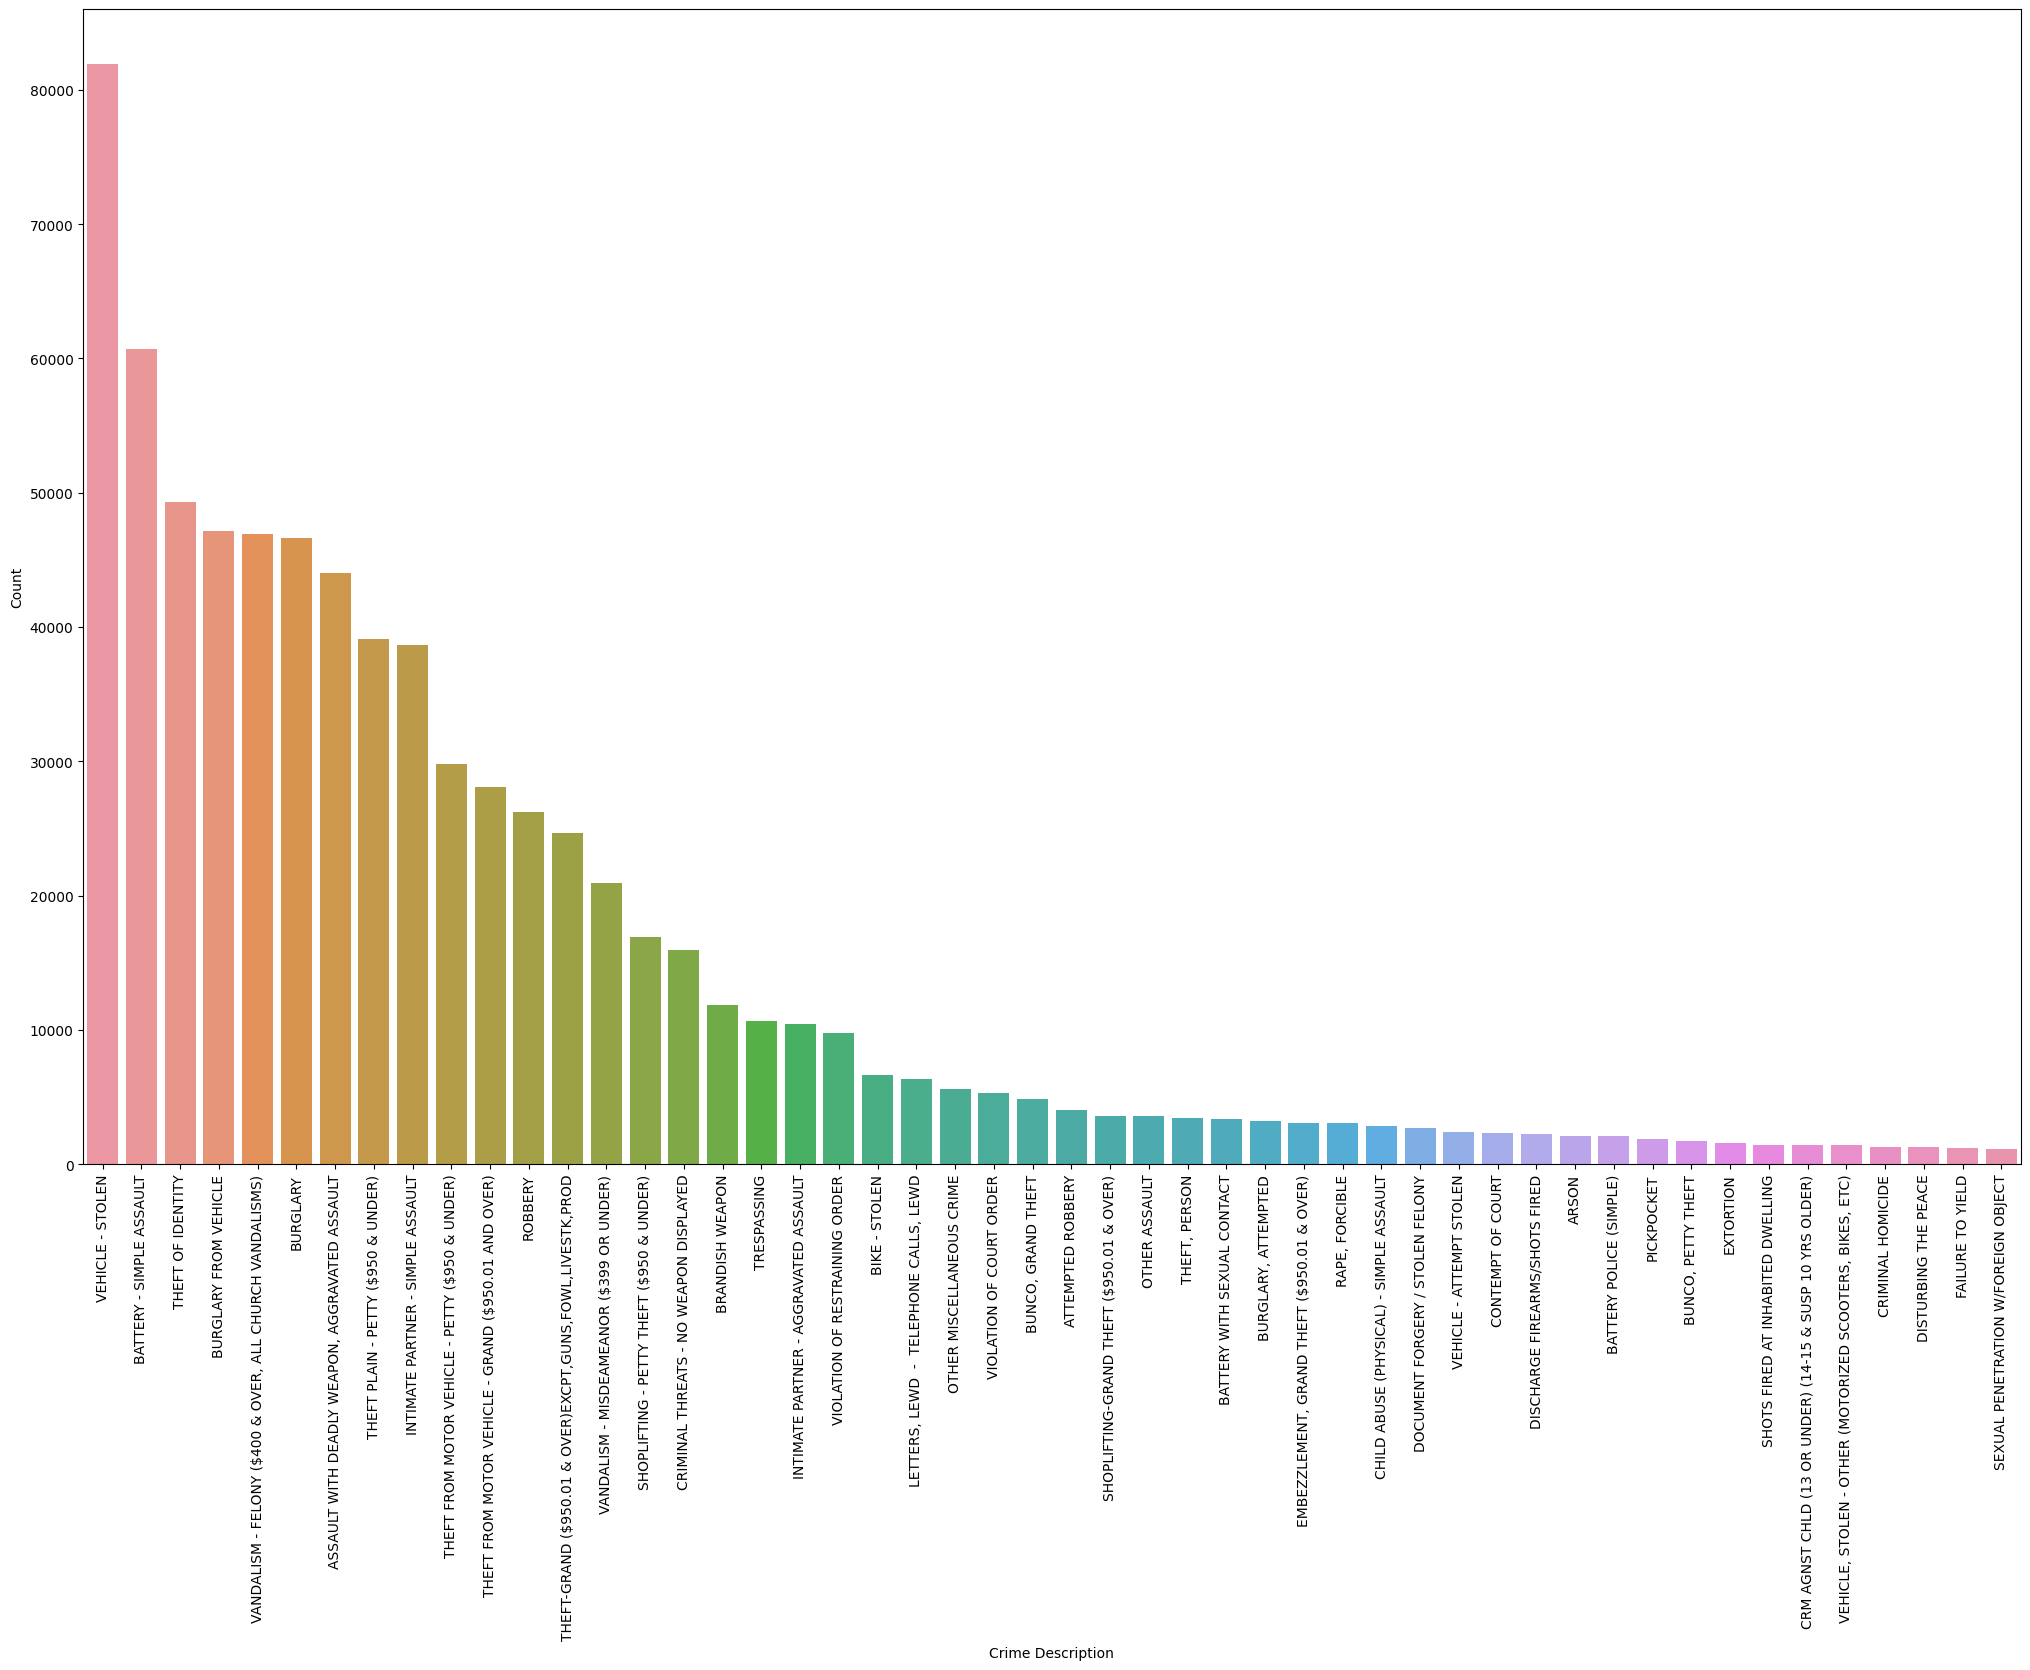

In [46]:
df['CRM_CD_DESC'] = df['Crm Cd Desc']

df2 = pd.DataFrame(columns = ['CRM_CD_DESC'])
df2['CRM_CD_DESC']=[each for each in df.CRM_CD_DESC.unique()]
df2["Count"]=[len(df[df.CRM_CD_DESC==each]) for each in df2.CRM_CD_DESC]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.CRM_CD_DESC.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Crime Description')
plt.ylabel('Count')
plt.show()

Let's look at the crime committed per day

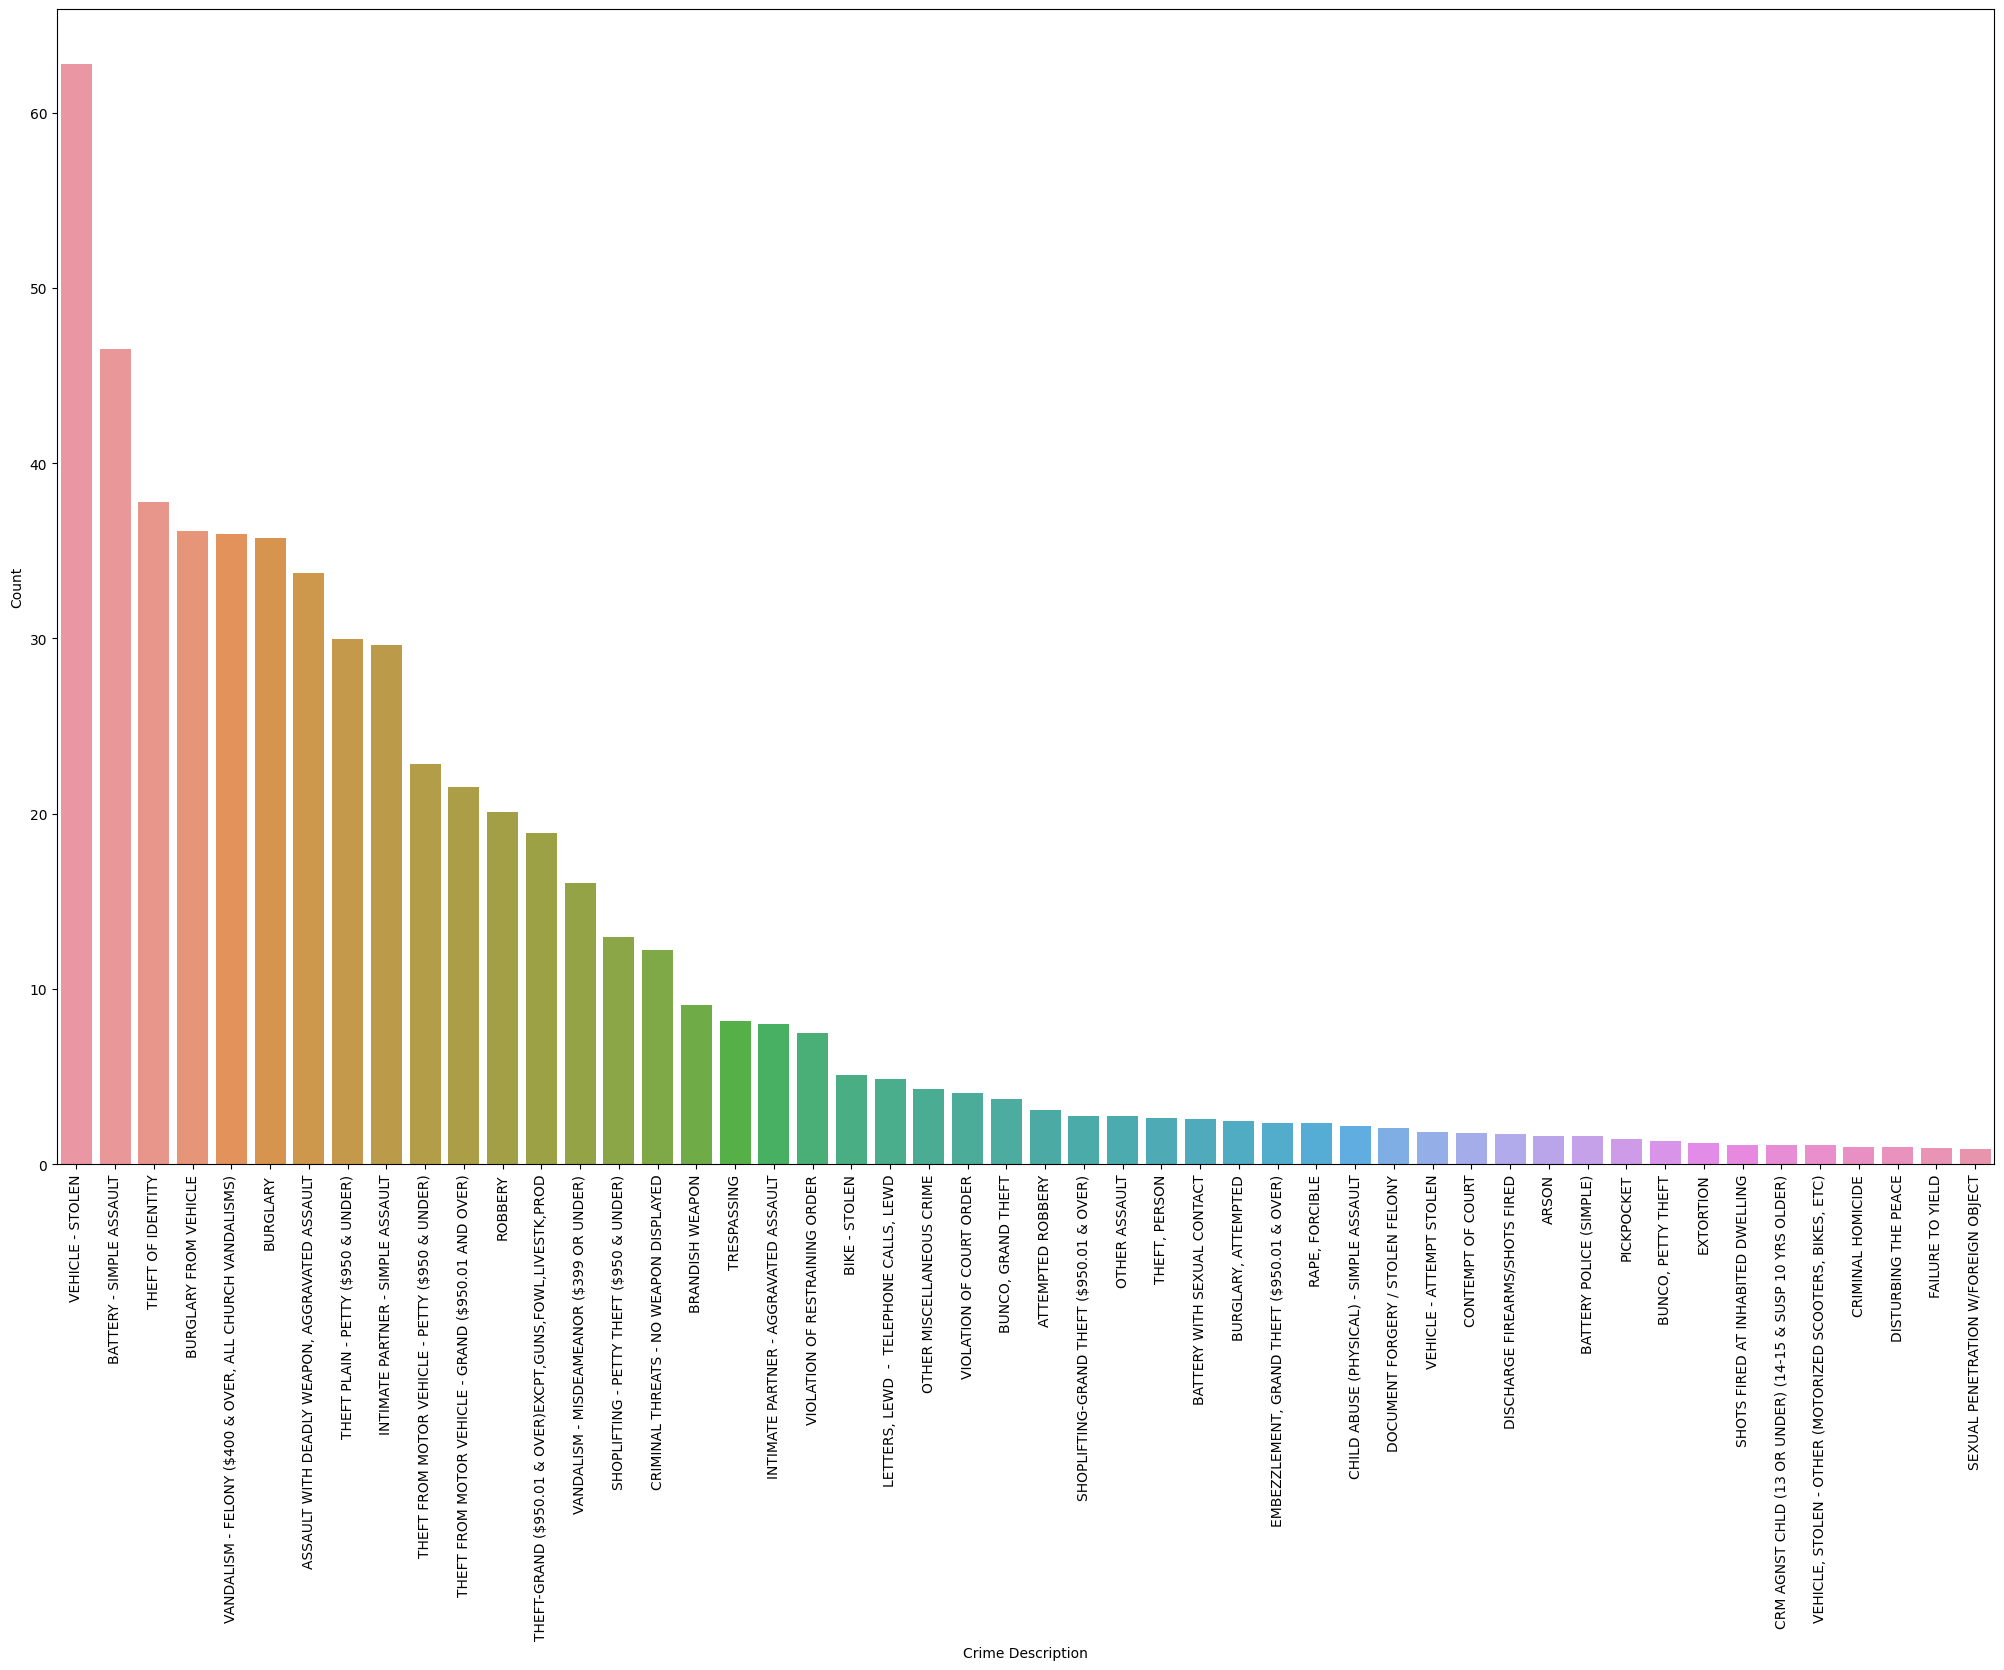

In [47]:
df['CRM_CD_DESC'] = df['Crm Cd Desc']

df2 = pd.DataFrame(columns = ['CRM_CD_DESC'])
df2['CRM_CD_DESC']=[each for each in df.CRM_CD_DESC.unique()]
df2["Count"]=[len(df[df.CRM_CD_DESC==each]) for each in df2.CRM_CD_DESC]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.CRM_CD_DESC.head(50), y=df2.Count.head(50)/daydiff)
plt.xticks(rotation= 90)
plt.xlabel('Crime Description')
plt.ylabel('Count')
plt.show()

Create a wordcloud based on the crimes

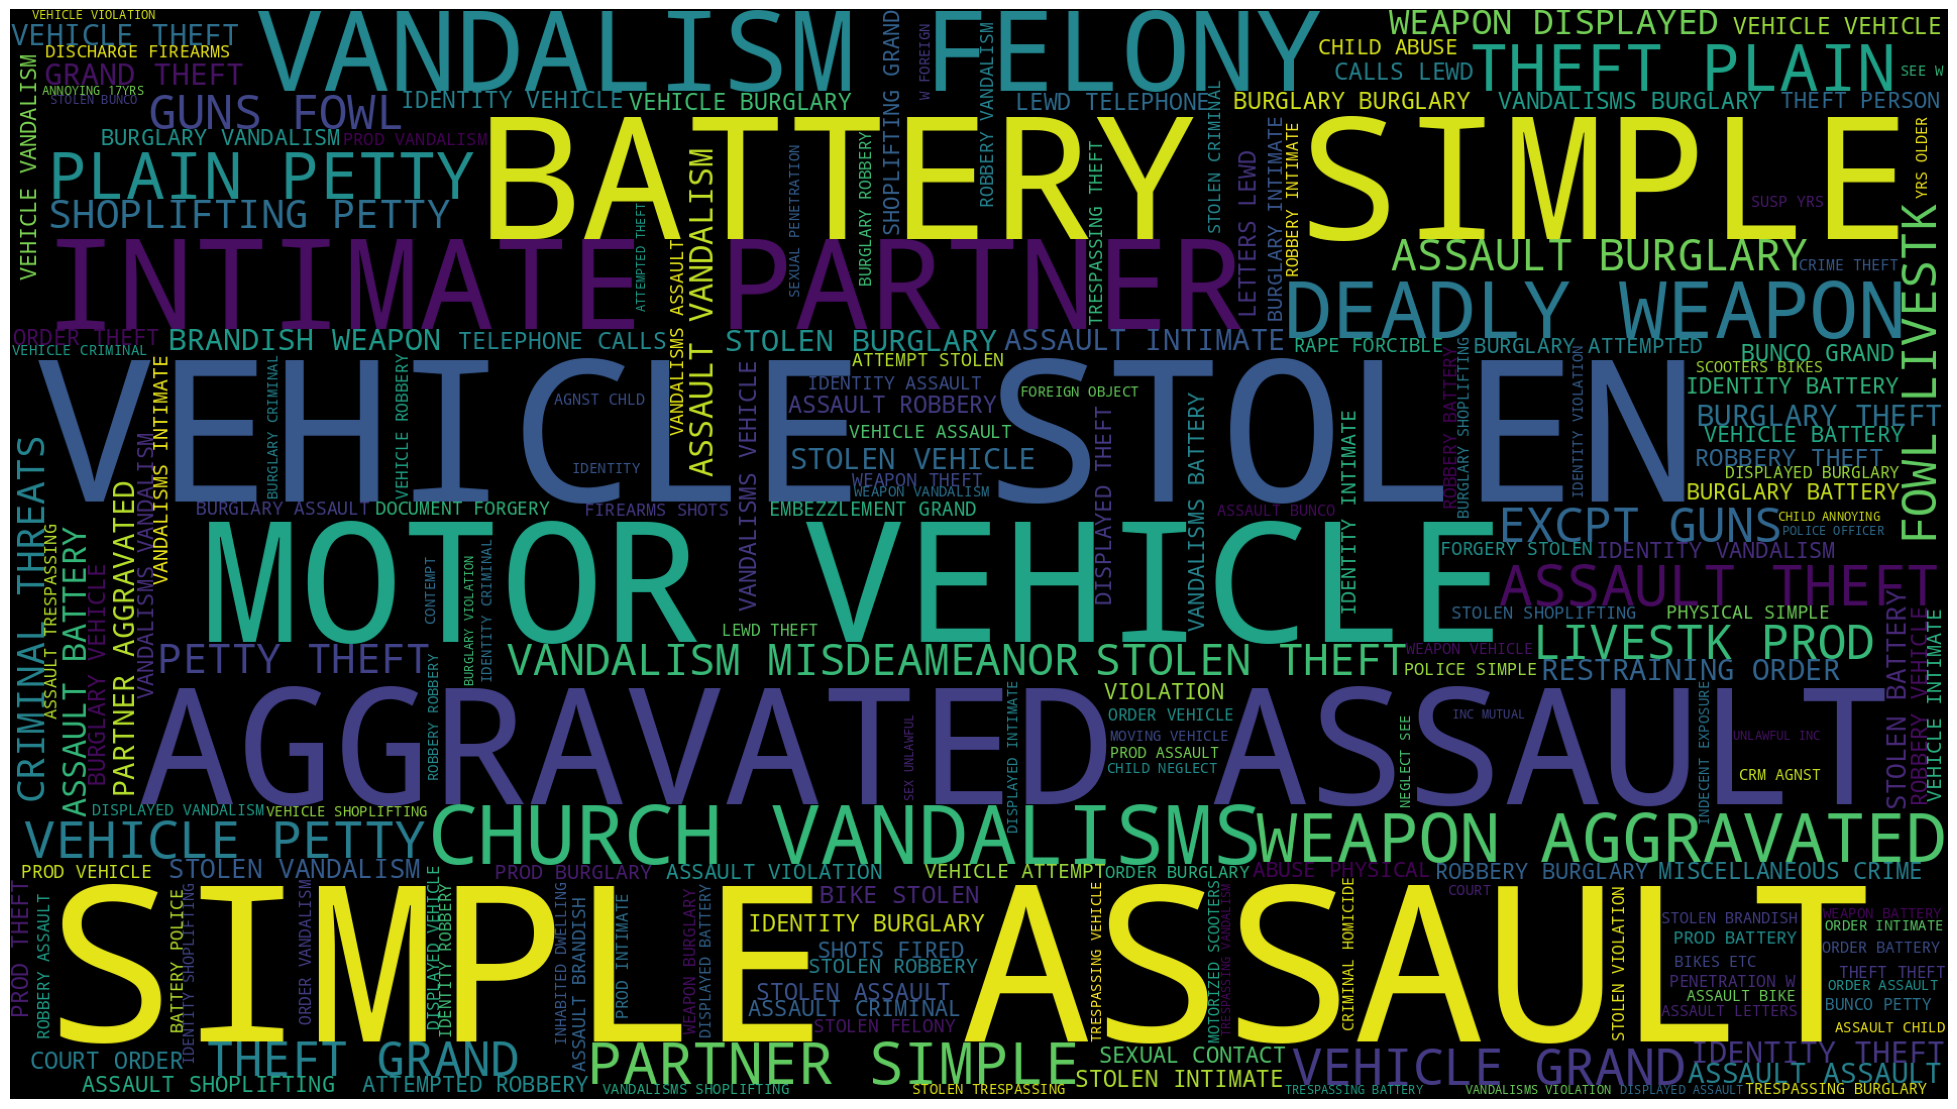

In [48]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.CRM_CD_DESC))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()